In [5]:
import os, re
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Simple plot configuration
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

# Define the folder structure
model_evaluation_results_folder_name = "Model Evaluation Results"
model_evaluation_results_folders = {
    "BERT": ["Hyperparameter-1", "Hyperparameter-2", "Hyperparameter-3", "Hyperparameter-4"],
    "DistilBERT": ["Hyperparameter-1", "Hyperparameter-2", "Hyperparameter-3", "Hyperparameter-4"]
}


BERT Model



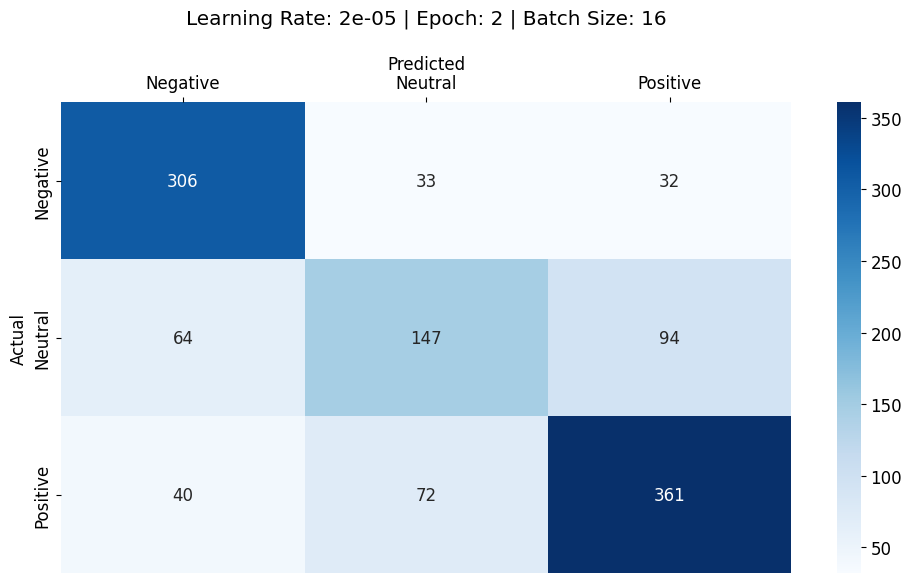

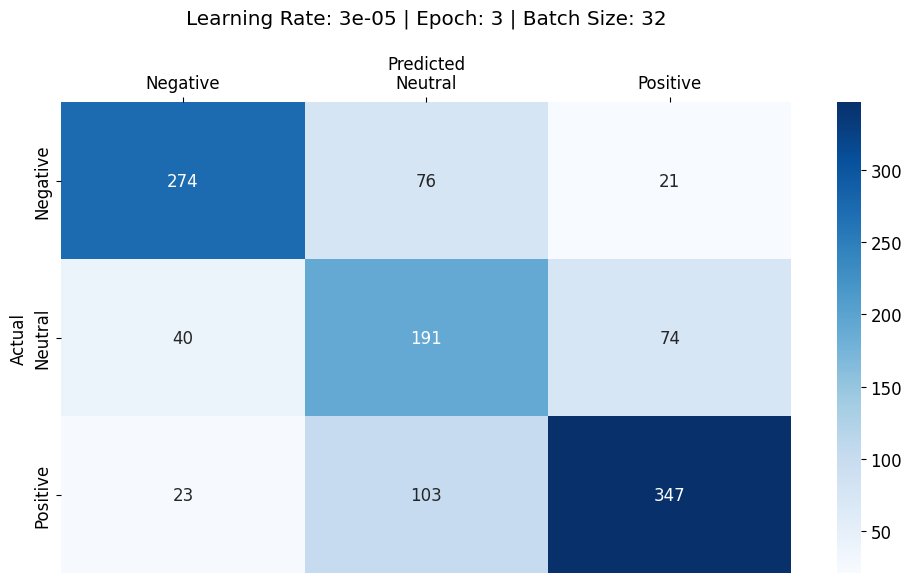

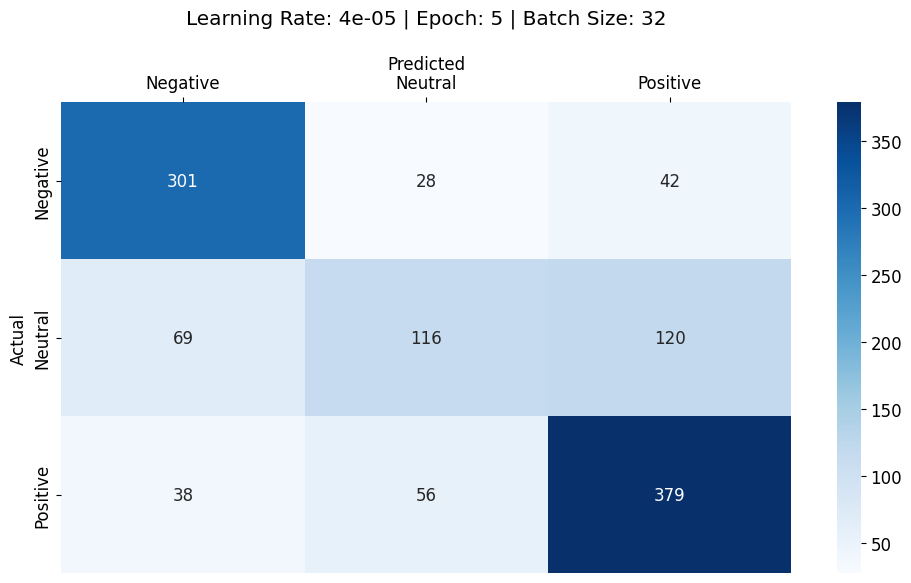

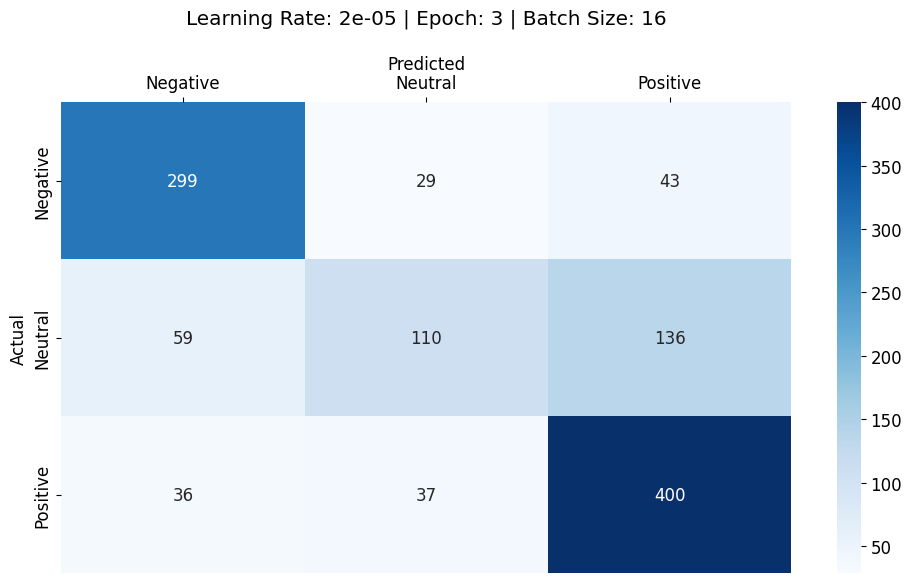


DistilBERT Model



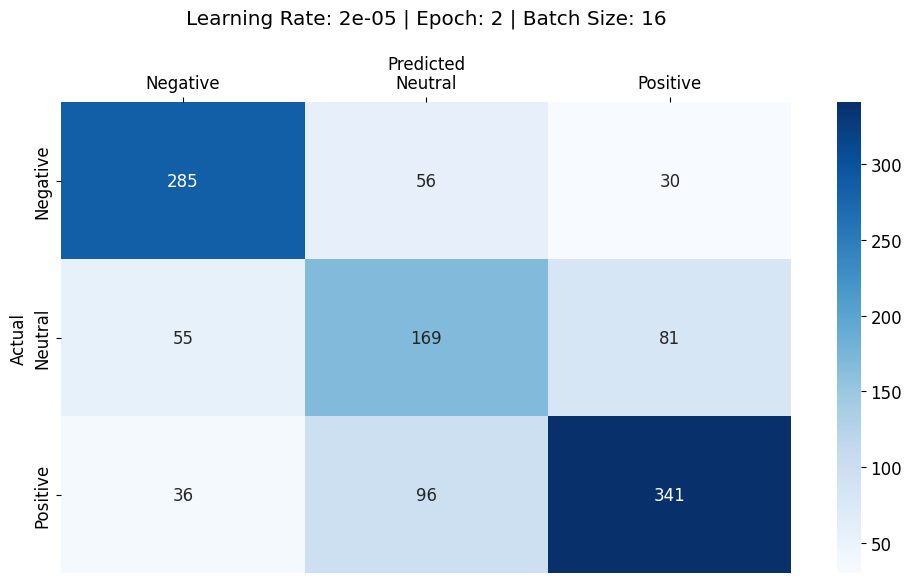

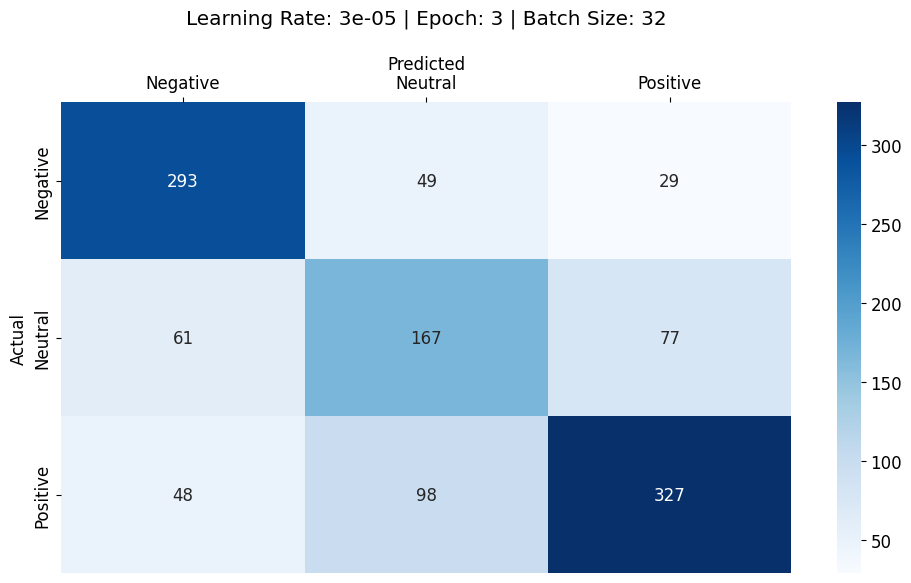

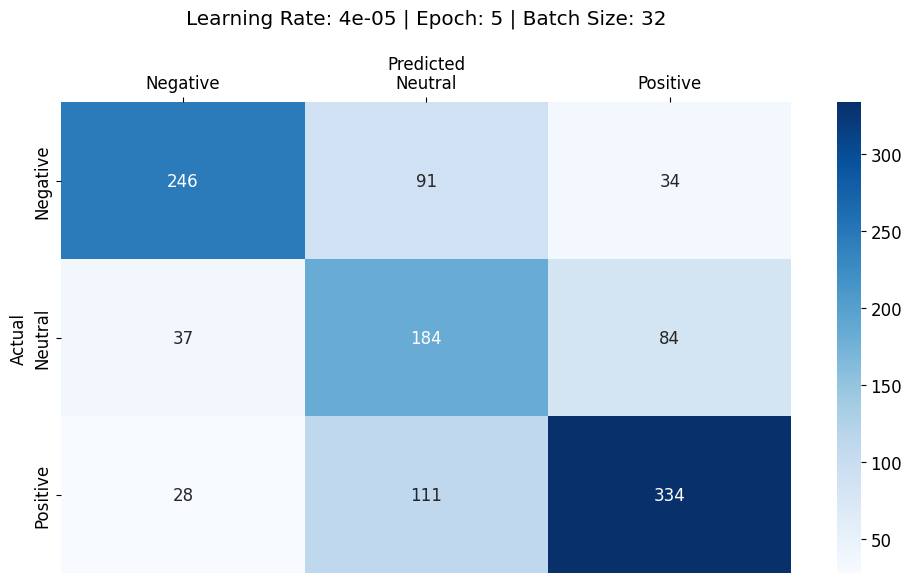

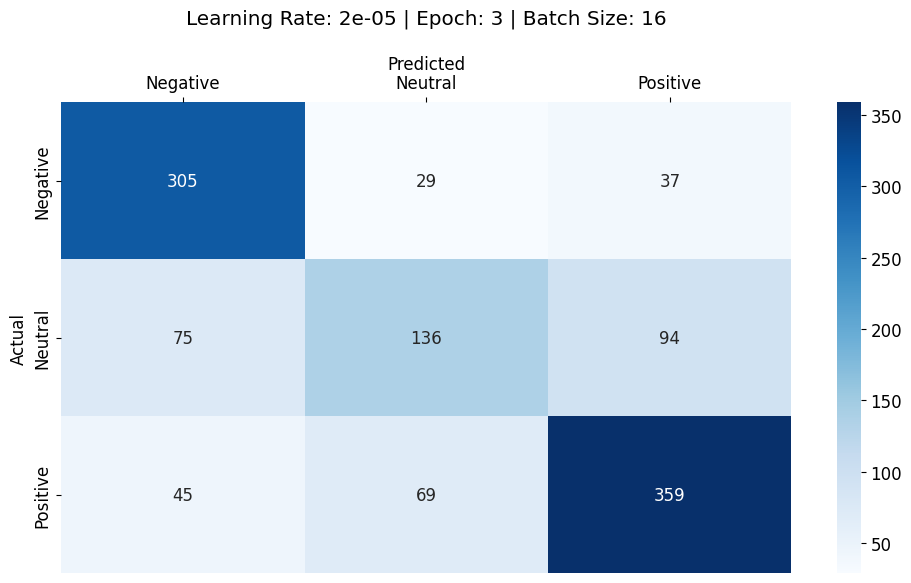

In [65]:
def create_confusion_matrix(y_true, y_pred, title):
    # Define mapping of class labels to words
    class_labels = [-1, 0, 1]  # Class labels for confusion matrix
    class_names = ["Negative", "Neutral", "Positive"]  # Class names corresponding to the labels
    
    # Create confusion matrix with defined labels
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    
    # Create figure for the heatmap
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot raw counts with correct labels (annot=True to show numbers inside heatmap cells)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    
    # Set title and axis labels
    ax.set_title(f'{title}\n')
    ax.set_xlabel('Predicted')  # X-axis represents predicted classes
    ax.set_ylabel('Actual')    # Y-axis represents true classes
    
    # Move x-axis label and ticks to the top
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    
    # Adjust layout to ensure everything fits well
    plt.tight_layout()
    
    # Display the plot
    plt.show()
def show_model_confusion_matrices():
    for model_folder in model_evaluation_results_folders:
        
        print(f"\n{model_folder} Model\n")
        
        for hyperparameter_folder in model_evaluation_results_folders[model_folder]:
            folder_path = os.path.join(
                model_evaluation_results_folder_name,
                model_folder,
                hyperparameter_folder
            )
            
            # Find prediction files
            unique_file_suffix = " - Predicted Dataset.csv"
            prediction_files = [f for f in os.listdir(folder_path) if f.endswith(unique_file_suffix)]
            
            for file in prediction_files:
                file_path = os.path.join(folder_path, file)
                
                # Load and validate data
                df = pd.read_csv(file_path)
                y_true, y_pred = df["Final_Sent"], df["Predicted_Sent"]
                
                # Create visualization
                params_short = file.replace(unique_file_suffix, "").split(", ")
                params_short = [
                    param.replace("LR ", "Learning Rate: ")
                         .replace("E ", "Epoch: ")
                         .replace("BS ", "Batch Size: ")
                    for param in params_short
                ]
                title = " | ".join(params_short)
                create_confusion_matrix(y_true, y_pred, title)

show_model_confusion_matrices()


BERT Model



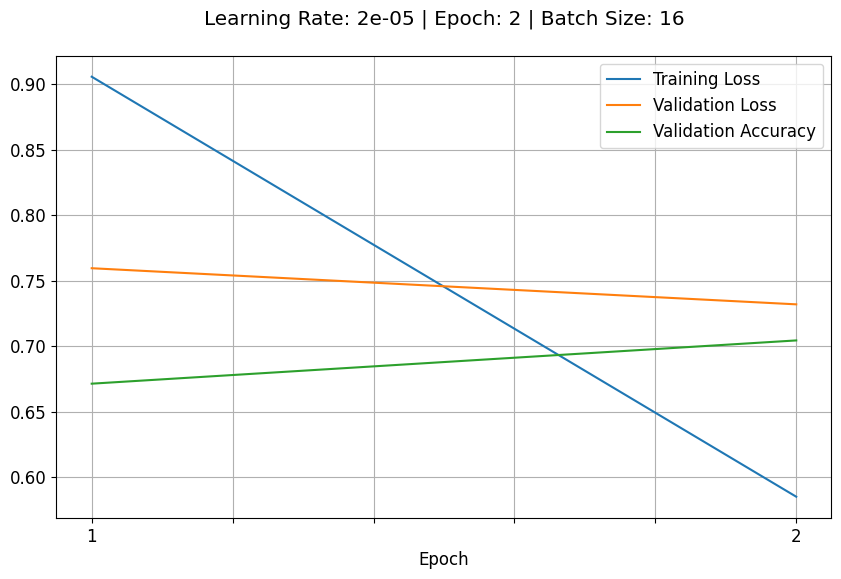

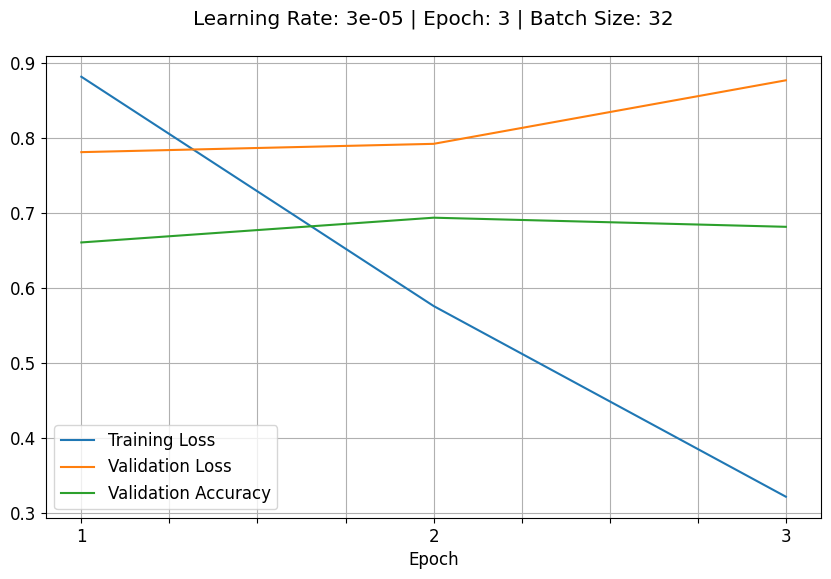

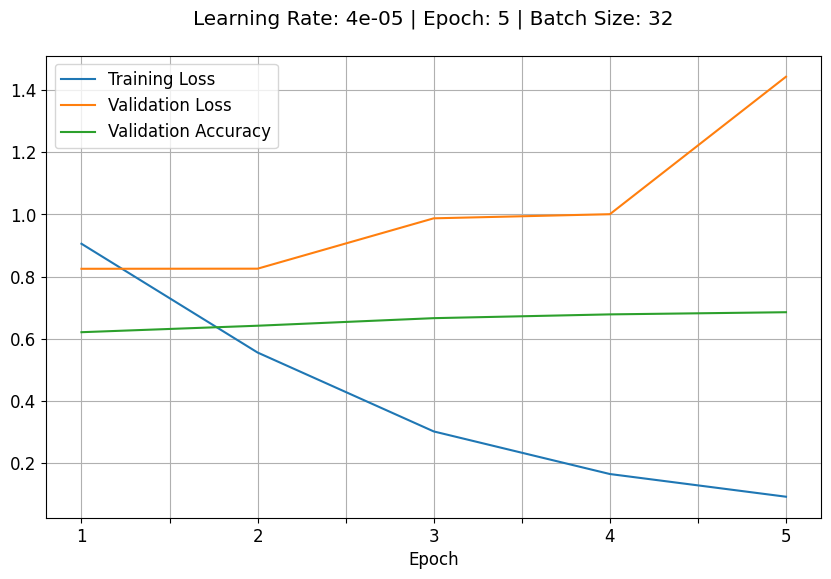

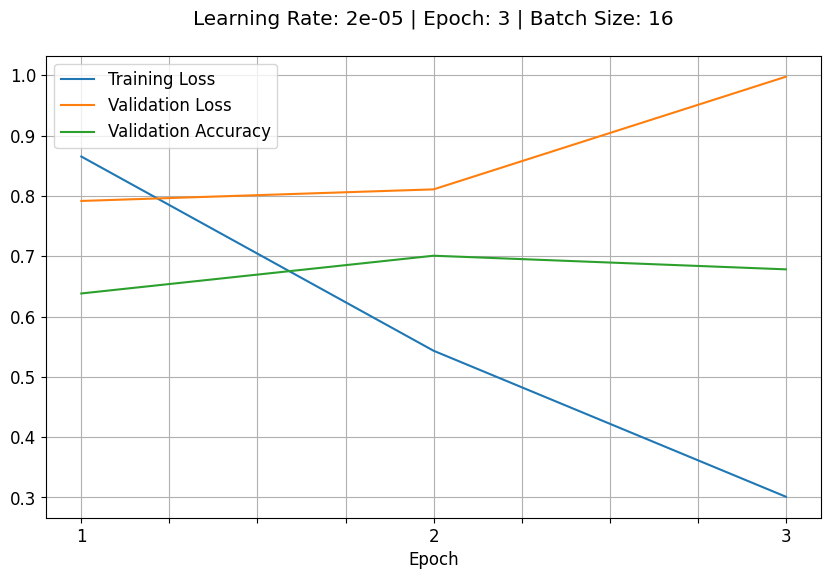


DistilBERT Model



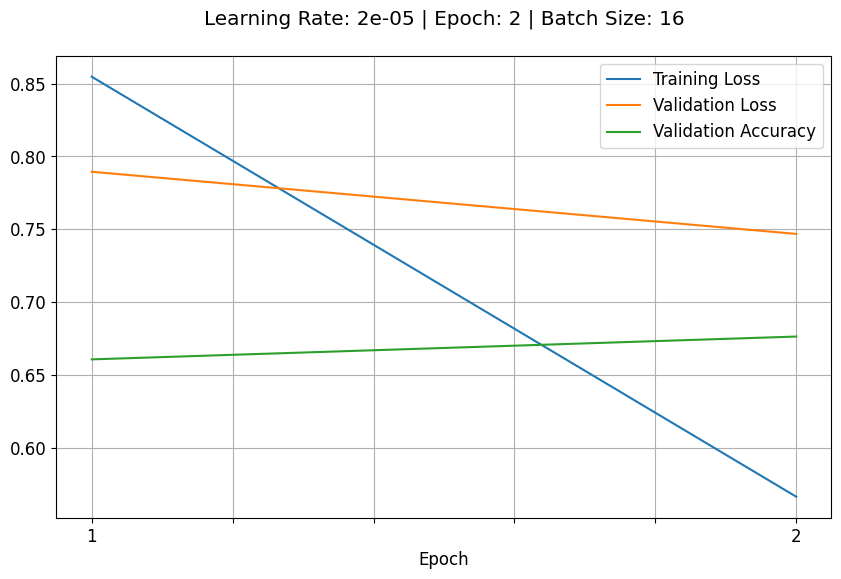

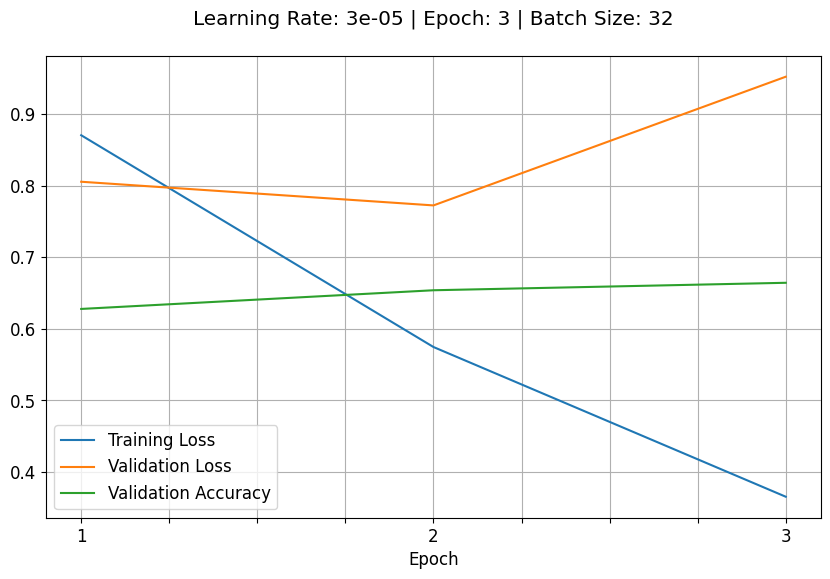

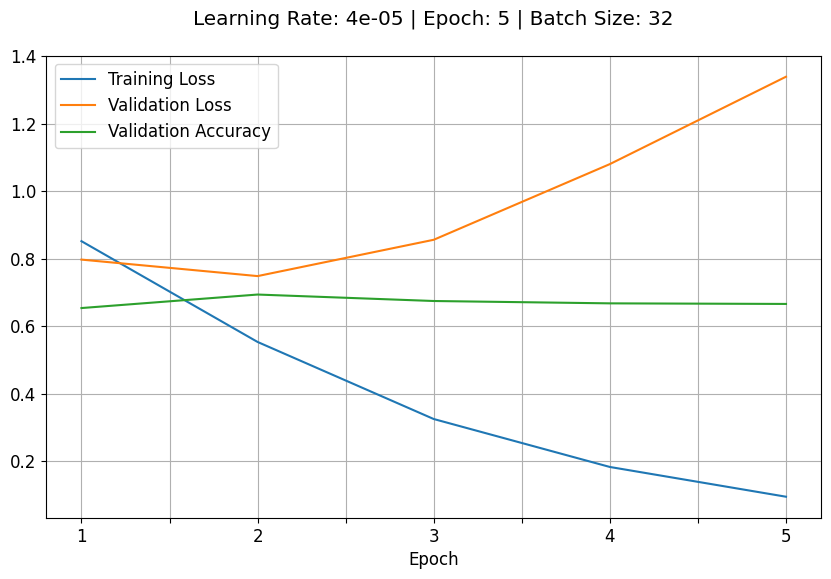

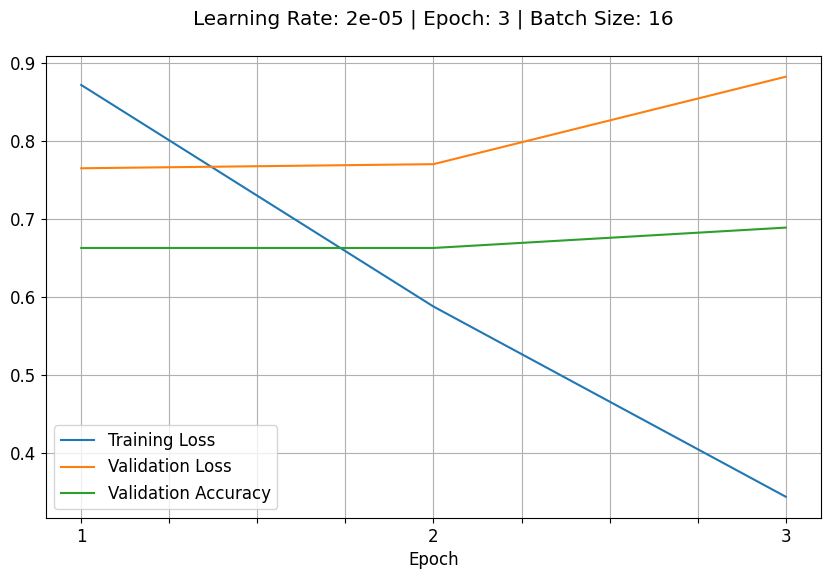

In [66]:
def create_validation_line_graph(val_metric_seq, title):
    # Create a figure with specified size
    plt.figure(figsize=(10, 6))
    
    # Loop through the validation metrics and plot each metric
    for key, val in val_metric_seq.items():
        plt.plot(range(1, len(val) + 1), val, label=key)  # Plot each metric for every epoch

    # Set title for the plot
    plt.title(f'{title}\n')
    
    # Format x-ticks to show integer values only (without decimals)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}' if x.is_integer() else ''))
    
    # Set the x-axis label and grid
    plt.xlabel('Epoch')
    plt.legend()  # Add legend to the plot
    plt.grid(True)  # Display grid for better visibility of the lines
    
    # Display the plot
    plt.show()
    
def show_model_validation_metrics():
    for model_folder in model_evaluation_results_folders:
        
        print(f"\n{model_folder} Model\n")
        
        for hyperparameter_folder in model_evaluation_results_folders[model_folder]:
            folder_path = os.path.join(
                model_evaluation_results_folder_name,
                model_folder,
                hyperparameter_folder
            )
            
            # Find prediction files
            unique_file_suffix = " - Validation Metric.csv"
            prediction_files = [f for f in os.listdir(folder_path) if f.endswith(unique_file_suffix)]
            
            for file in prediction_files:
                file_path = os.path.join(folder_path, file)
                
                # Load data
                df = pd.read_csv(file_path)
                val_metric_seq = df.to_dict(orient='list')
                val_metric_seq = {
                    key
                    .replace('_', ' ')
                    .replace('val ', 'Validation ')
                    .replace('train ', 'Training ')
                    .title(): value for key, value in val_metric_seq.items()
                }
                
                # Create visualization
                params_short = file.replace(unique_file_suffix, "").split(", ")
                params_short = [
                    param.replace("LR ", "Learning Rate: ")
                         .replace("E ", "Epoch: ")
                         .replace("BS ", "Batch Size: ")
                    for param in params_short
                ]
                title = " | ".join(params_short)
                create_validation_line_graph(val_metric_seq, title)

show_model_validation_metrics()


BERT Model



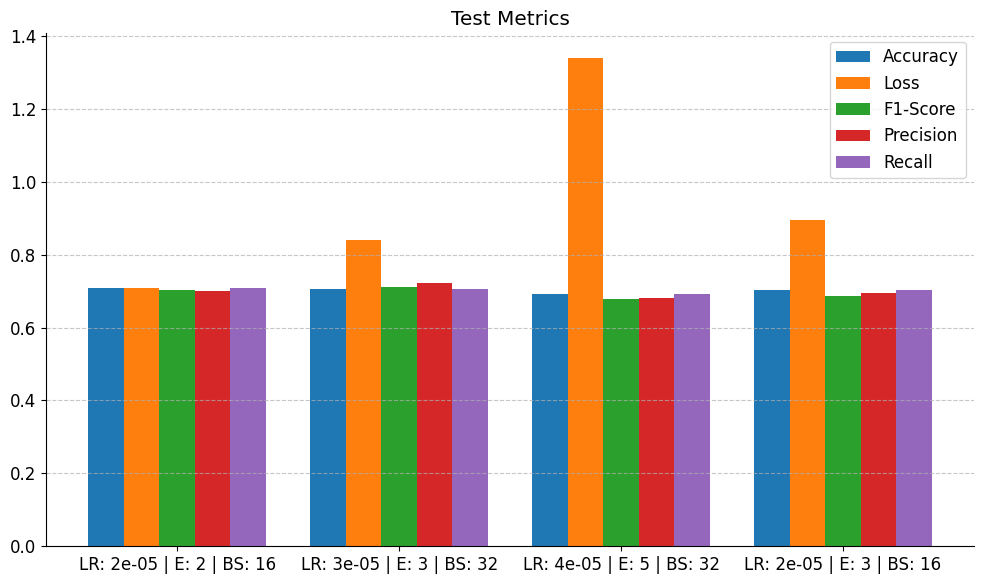


DistilBERT Model



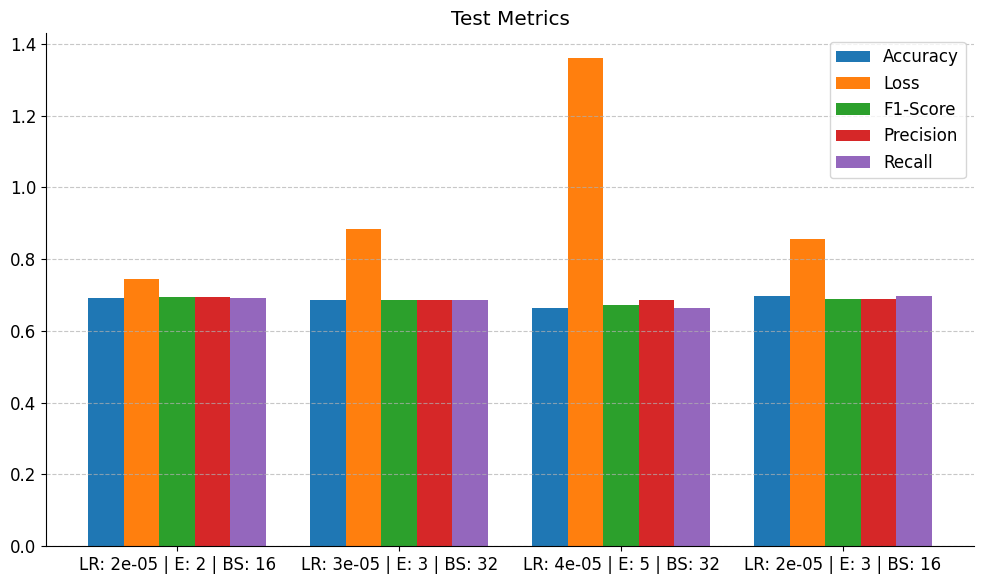

In [110]:
def plot_test_metrics(model_test_metrics, model_parameters, title):
    plt.figure(figsize=(10, 6))

    n_model_parameters = len(model_parameters)
    model_test_metric_names = [model_test_metric_name for model_test_metric_name in model_test_metrics]
    n_model_test_metric_names = len(model_test_metric_names)
    
    total_width = 0.8  # Total width allotted for each group of bars
    width = total_width / n_model_test_metric_names  # Width of each individual bar
    
    # Compute offsets for each bar so that the centers line up at the group position.
    # For even number of bars, np.linspace will produce symmetric offsets.
    offsets = np.linspace(-total_width/2 + width/2, total_width/2 - width/2, n_model_test_metric_names)
    
    # Group positions where each group's center should be
    group_positions = np.arange(n_model_parameters)
    
    for idx, model_test_metric_name in enumerate(model_test_metric_names):
        # Calculate new x positions using the computed offset.
        x = group_positions + offsets[idx]
        # Use align='center' so that the x value is interpreted as the center of the bar.
        plt.bar(x, model_test_metrics[model_test_metric_name], width=width, label=model_test_metric_name, align='center')
    
    # Set x-tick positions at the center of each group.
    plt.xticks(group_positions, model_parameters)
    
    plt.title(title)
    plt.legend()
    
    # Optional styling: remove top/right spines and add gridlines.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def show_model_test_metrics():
    for model_folder in model_evaluation_results_folders:
        
        print(f"\n{model_folder} Model\n")
        # First Param - ['2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4']
        # Second Param - ['Group Key 1', ]

        model_test_metric_names = ['Accuracy', 'Loss', 'F1-Score', 'Precision', 'Recall']
        model_parameters = []
        model_test_metrics = {
            'Accuracy': [],
            'Loss': [],
            'F1-Score': [],
            'Precision': [],
            'Recall': [],
        }
        
        for hyperparameter_folder in model_evaluation_results_folders[model_folder]:
            folder_path = os.path.join(
                model_evaluation_results_folder_name,
                model_folder,
                hyperparameter_folder
            )
            
            # Find prediction files
            unique_file_suffix = " - Test Metric.csv"
            prediction_files = [f for f in os.listdir(folder_path) if f.endswith(unique_file_suffix)]
            
            for file in prediction_files:
                file_path = os.path.join(folder_path, file)
                
                # Load data
                df = pd.read_csv(file_path)
                test_metrics = df.iloc[0].to_dict()
                test_metrics = {
                    key.title(): value for key, value in test_metrics.items()
                }
                
                # Get and Edit Parameter Name
                params_short = file.replace(unique_file_suffix, "").split(", ")
                params_short = [
                    param.replace("LR ", "LR: ")
                         .replace("E ", "E: ")
                         .replace("BS ", "BS: ")
                    for param in params_short
                ]
                parameter_name = " | ".join(params_short)

                # Create parameter item with its test metrics
                for metric in model_test_metrics:
                    if test_metrics[metric] is None:
                        raise Exception(f'Missing Test Metric "{metric}" in "{file_path}"') 
                    else:
                        model_test_metrics[metric].append(test_metrics[metric])
                        
                model_parameters.append(parameter_name)

        # Create visualization
        plot_test_metrics(model_test_metrics, model_parameters, 'Test Metrics')


show_model_test_metrics()